In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [293]:
mytrain = pd.read_csv('data/happiness_train_complete.csv', parse_dates=['survey_time'],encoding="GB2312" )
mytest = pd.read_csv('data/happiness_test_complete.csv', parse_dates=['survey_time'], encoding="GB2312")

In [294]:
#查看数据
mytrain.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [295]:
#查看happiness的值
mytrain['happiness'].value_counts()

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64

In [296]:
tmp_train=pd.DataFrame(mytrain)
tmp_train.shape

(8000, 140)

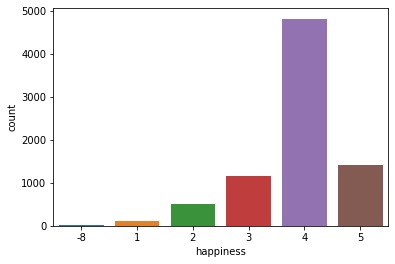

In [297]:
y_train = mytrain['happiness']
y_train = y_train.map(lambda x:3 if x==-8 else x)
# y_train.plot.hist()
sns.countplot(x='happiness', data=mytrain)


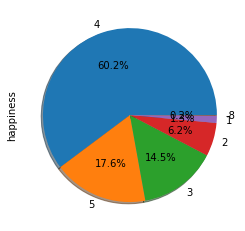

In [298]:
mytrain['happiness'].value_counts().plot.pie(autopct='%1.1f%%' ,shadow=True)
plt.show()

In [299]:

mytrain.drop(["happiness"],axis=1,inplace=True)
# 合并在一起方便处理 训练集和测试集
all_data = pd.concat((mytrain,mytest),axis=0)


In [300]:
#查看缺失值
total = all_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total,columns=['missing'])
missing_data[missing_data['missing']>0]


,missing
edu_other,10962
invest_other,10923
property_other,10879
join_party,9842
s_work_type,7444
s_work_status,7444
work_status,6939
work_yr,6939
work_manage,6938
work_type,6938


In [301]:
all_data.drop( ['edu_other','invest_other','property_other','join_party',
              's_work_type','s_work_status','work_status',
              'work_yr','work_manage','work_type',],axis=1,inplace=True)
# all_data.drop(['religion_freq','social_neighbor','work_exper','invest_8','inc_ability','trust_11'],axis=1,inplace=True)

In [302]:

#这些缺失值是因为没有结婚而导致的，所以全部缺失值填充为0 
all_data['s_political'].fillna(0,inplace=True)
all_data['s_hukou'].fillna(0,inplace=True)
all_data['s_income'].fillna(0,inplace=True)
all_data['s_birth'].fillna(0,inplace=True)
all_data['s_edu'].fillna(0,inplace=True)     
all_data['s_work_exper'].fillna(0,inplace=True)

In [303]:
all_data['edu_status'].fillna(0,inplace=True)
all_data['edu_yr'].fillna(0,inplace=True)

In [304]:

all_data['social_friend'].fillna(7,inplace=True)
all_data['social_neighbor'].fillna(7,inplace=True)


In [305]:
all_data['minor_child'].fillna(0,inplace=True)


In [306]:

# 户口情况
#缺失值是由于没有户口造成的
#全部缺失值填充为4
all_data['hukou_loc'].fillna(4,inplace=True)

In [307]:

# 婚姻情况
all_data['marital_now'].fillna(-1,inplace=True) 
all_data['marital_1st'].fillna(-1,inplace=True)

In [308]:
all_data['family_income'].fillna(all_data['family_income'].mean(),inplace=True)

In [309]:
#查看缺失值
total = all_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total,columns=['missing'])
missing_data[missing_data['missing']>0]

,missing


In [310]:
tmp_train.shape

(8000, 140)

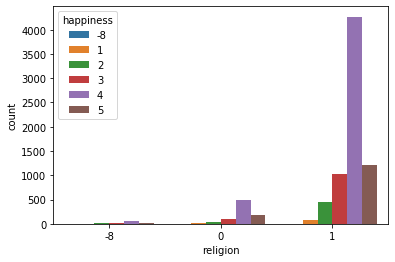

In [311]:
sns.countplot('religion', hue='happiness', data=tmp_train)

In [312]:
all_data.drop(['religion','religion_freq'],axis=1,inplace=True)

In [313]:
col=['happiness','property_0','property_1','property_2','property_3','property_4','property_5','property_6','property_7']
pro_data=tmp_train[col]
pro_data.corr()['happiness']


happiness     1.000000
property_0   -0.080732
property_1   -0.009040
property_2    0.040867
property_3    0.031487
property_4    0.016762
property_5    0.014323
property_6    0.010124
property_7   -0.011700
Name: happiness, dtype: float64

In [314]:

all_data.drop(['property_0','property_3','property_4','property_5',
             'property_6','property_7','property_8'],axis=1,inplace=True)


In [315]:
col=['happiness','insur_1','insur_2','insur_3','insur_4']
pro_data=tmp_train[col]
pro_data.corr()['happiness']


happiness    1.000000
insur_1     -0.002966
insur_2     -0.017432
insur_3      0.040919
insur_4      0.037924
Name: happiness, dtype: float64

In [316]:
all_data.drop(['insur_1','insur_2','insur_3','insur_4'],axis=1,inplace=True)

In [317]:
all_data.drop(['f_political','m_political'],axis=1,inplace=True)

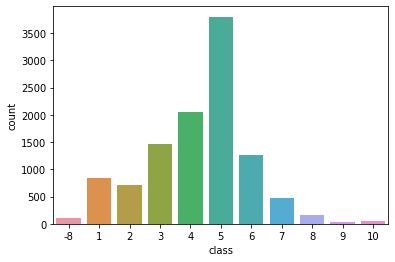

In [318]:

sns.countplot(x='class', data=all_data)
all_data['class'] = all_data['class'].map(lambda x:5 if x==-8 else x)

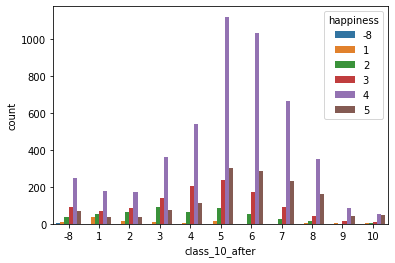

In [319]:
sns.countplot('class_10_after', hue='happiness', data=tmp_train)

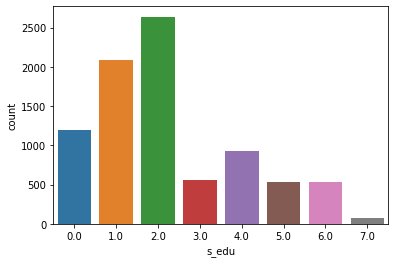

In [320]:
all_data['edu'] = all_data['edu'].map(lambda x:0 if x==-8 else x)
# df_all['edu'] = df_all['edu'].map(lambda x:0 if x==14 else x)
# sns.countplot(x='edu', data=df_all)
def edu_split(x):
    if x in [1,2,14]:
        return 0
    elif x in [3]:
        return 1
    elif x in [4]:
        return 2
    elif x in [5,7,8]:
        return 3
    elif x in [6]:
        return 4
    elif x in [9,10]:
        return 5
    elif x in [11,12]:
        return 6
    elif x in[13]:
        return 7
all_data["edu"]=all_data["edu"].map(edu_split)
all_data["s_edu"] = all_data["s_edu"].map(edu_split)
sns.countplot(x='s_edu', data=all_data)


In [321]:

all_data['survey_time'] = pd.to_datetime(all_data['survey_time'],format='%Y-%m-%d %H:%M:%S')
all_data["hour"]=all_data["survey_time"].dt.hour

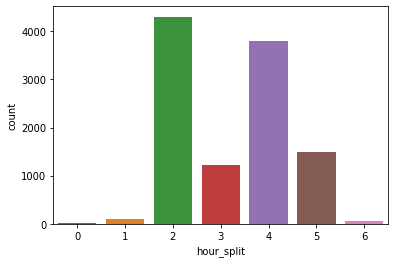

In [322]:

#把一天的时间分段
def hour_split(x):
    if 0<=x<6:
        return 0
    elif  6<=x<8:
        return 1
    elif  8<=x<12:
        return 2
    elif  12<=x<14:
        return 3
    elif  14<=x<18:
        return 4
    elif  18<=x<21:
        return 5
    elif  21<=x<24:
        return 6

    
all_data["hour_split"]=all_data["hour"].map(hour_split)
sns.countplot(x='hour_split', data=all_data)
all_data.drop(['hour'],axis=1,inplace=True)

In [323]:

#出生的年代
def birth_split(x):
    if(x<1920):
        return 0
    if 1920<=x<=1930:
        return 1
    elif  1930<x<=1940:
        return 2
    elif  1940<x<=1950:
        return 3
    elif  1950<x<=1960:
        return 4
    elif  1960<x<=1970:
        return 5
    elif  1970<x<=1980:
        return 6
    elif  1980<x<=1990:
        return 7
    elif  1990<x<=2000:
        return 8

In [324]:

all_data["birth_s"]=all_data["birth"].map(birth_split)

In [325]:

# 年龄划分
def age_class(x):
    if(x<0):
        return 0
    elif(x>0 and x<=16):
        return 1
    elif(x>16 and x<=32):
        return 2
    elif(x>32 and x<=48):
        return 3
    elif(x>48 and x<=64):
        return 4
    elif(x>64 and x<=80):
        return 5
    elif(80<x<=96):
        return 6
    else:
        return 7

In [326]:
all_data['age']=pd.to_datetime(all_data['survey_time']).dt.year-all_data['birth']
all_data["age_class"]=all_data['age'].map(age_class)

In [327]:
# 既然已对年龄分了级 那么就应该去掉age
all_data.drop(['age'],axis=1,inplace=True)

In [328]:

def  get_fat(x):
    if(x<0):
        return 1
    elif(x>0 and x<18.5):
        return 1
    elif(x>=18.5 and x<24):
        return 2 
    elif(x>=24 and x<28):
        return 3
    elif(x>28 and x<30):
        return 4
    else:
        return 5

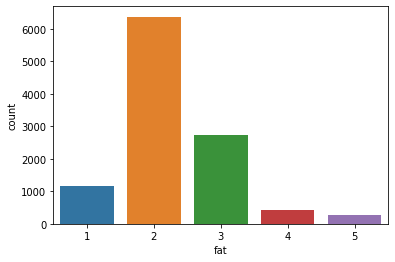

In [329]:
# 增加BMI

height = all_data["height_cm"]/100
kg = all_data["weight_jin"]/2

bmi = kg/pow(height,2)

all_data["bmi"] = bmi

all_data["fat"] = all_data["bmi"].map(get_fat)

sns.countplot(x='fat', data=all_data)
all_data.drop(['bmi'],axis=1,inplace=True)

In [330]:
def  weight_class(x):
    if(x<80):
        return 1
    elif(x>=80 and x<100):
        return 1
    elif(x>=100 and x<120):
        return 2 
    elif(x>=120 and x<150):
        return 3
    elif(x>=150 and x<180):
        return 4
    else:
        return 5

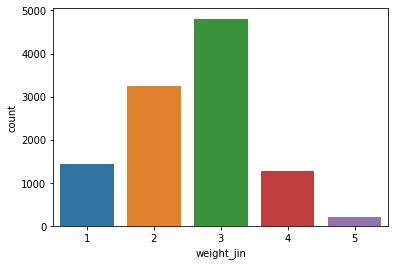

In [331]:
all_data["weight_jin"] = all_data["weight_jin"].map(weight_class)
sns.countplot(x='weight_jin', data=all_data)

In [332]:
def  height_class(x):
    if(x<150):
        return 1
    elif(x>=150 and x<160):
        return 1
    elif(x>=160 and x<170):
        return 2 
    elif(x>=170 and x<180):
        return 3
    elif(x>=180 and x<190):
        return 4
    else:
        return 5

In [333]:
all_data["height_cm"] = all_data["height_cm"].map(height_class)
# 

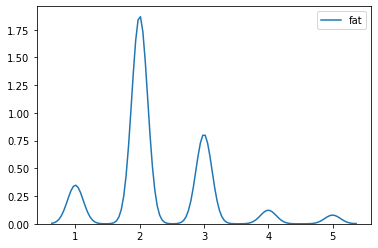

In [334]:
sns.kdeplot(all_data['fat'])

In [335]:
#all_data.drop(['weight_jin'],axis=1,inplace=True)

In [336]:

# 收入分级
def get_income_class(x):
    if(x<=0):
        return 0
    if 0< x < 2800:
        return  1
    elif 2800<= x <10000:
        return 2
    elif 10000 <= x <27000:
        return 3
    elif 27000<= x <100000:
        return 4
    else : return 5

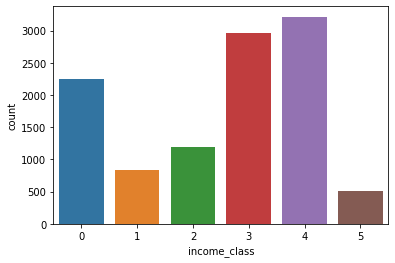

In [337]:
#再对收入进行分级
all_data["income"] = all_data["income"].map(lambda x:0 if x<0 else x)
all_data["income_class"] = all_data["income"].map(get_income_class)
all_data.drop(['income'],axis=1,inplace=True)
sns.countplot(x='income_class', data=all_data)


In [338]:
# 对住房面积进行划分
def floor_area_split(x):
    if(x<=0):
        return 0
    if 0<x<15:
        return 1
    elif 15<=x<30:
        return 2
    elif 30<=x<50:
        return 3
    elif 50<=x<80:
        return 4
    elif 80<=x<96:
        return 5
    elif 96<=x<110:
        return 6
    elif 110<=x<130:
        return 7
    elif 130<=x<200:
        return 8
    elif x>=200:
        return 9



In [339]:
all_data["floor_area_s"]=all_data["floor_area"].map(floor_area_split)

In [340]:

# 对省份进行分级
def province_split(x):
    if x in [6,1,12,28,13]:
        return 0
    elif x in [24,29,26,2,8,22,21]:
        return 1
    elif x in [16,31]:
        return 2
    elif x in [9,7,15,11,18,30,27,19]:
        return 3
    elif x in [23,5,10,4,3,17,4]:
        return 4

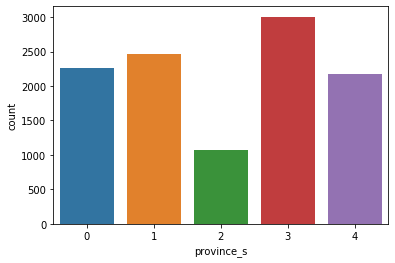

In [341]:
all_data["province_s"]=all_data["province"].map(province_split)
sns.countplot(x='province_s', data=all_data)

In [342]:
# 既然已对省份划分 那么省去省份这个属性
all_data.drop(['province'],axis=1,inplace=True)


In [343]:
# 人均住房面积 
all_data['aver_area']=all_data['floor_area']/all_data['family_m']
# 删除住房面积,人居住房面积
all_data.drop(['floor_area'],axis=1,inplace=True)

In [344]:
all_data.drop(['id'],axis=1,inplace=True)
all_data.drop(['survey_time','birth'],axis=1,inplace=True)

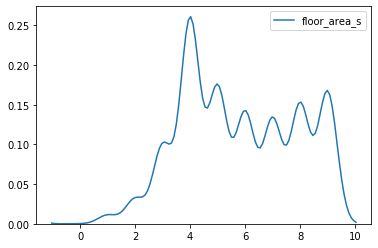

In [345]:
sns.kdeplot(all_data['floor_area_s'])

In [346]:
all_data['mar_yr']=2015-all_data['marital_now']
all_data.drop(['s_birth','f_birth','m_birth'],axis=1,inplace=True)
all_data.drop(['marital_now'],axis=1,inplace=True)


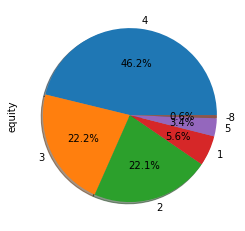

In [347]:
all_data['equity'].value_counts().plot.pie(autopct='%1.1f%%' ,shadow=True)

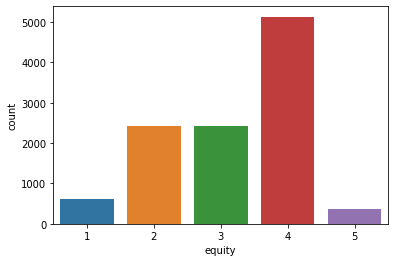

In [348]:
# 公平

all_data['equity'] = all_data['equity'].map(lambda x:4 if x==-8 else x)
sns.countplot(x='equity', data=all_data)

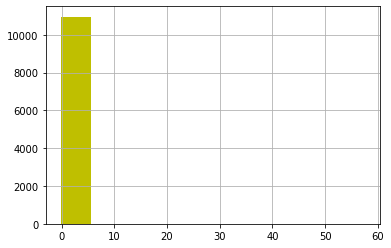

In [349]:

numeric_cols=['height_cm','s_income','house','family_income','family_m'
              ,'son','daughter','minor_child','inc_exp','public_service_1',
              'public_service_2','public_service_3','public_service_4',
              'public_service_5','public_service_6','public_service_7',
              'public_service_8','public_service_9','aver_area','mar_yr']
numeric_cols_means=all_data.loc[:,numeric_cols].mean()
numeric_cols_std=all_data.loc[:,numeric_cols].std()
df_numeric=(all_data.loc[:,numeric_cols]-numeric_cols_means)/numeric_cols_std
df_numeric.iloc[:,1].hist(color='y')

In [350]:
# 对object类型进行规范化  调用get_dummies函数
df_object=all_data.drop(numeric_cols,axis=1)
df_object=df_object.astype(str)
for cols in list(df_object.iloc[:,1:].columns):
    df_object=pd.get_dummies(df_object.iloc[:,1:],prefix=cols)


In [351]:

data=pd.concat((df_object,df_numeric),axis=1)

In [352]:
train_data=data.iloc[:8000,:]
test_data=data.iloc[8000:,:]
X_train=train_data.values
X_test=test_data.values
print(len(X_train))
print(len(y_train))
print(len(X_test))

8000
8000
2968


In [353]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, RepeatedKFold

import xgboost as xgb

In [354]:
#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

In [355]:
xgb_params = {"booster":'gbtree','eta': 0.01, 'max_depth': 5, 'subsample': 0.7, 
              'colsample_bytree': 0.6, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'nthread': 8}
# xgb_params ={'max_depth':[4,5,6],'min_child_weight':list(range(1,6,2))}

folds = KFold(n_splits=3, shuffle=True, random_state=2018)
oof_xgb = np.zeros(8000)
predictions_xgb = np.zeros(2968)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])
    
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params,feval = myFeval)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
# print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train_)))

fold n°1
[14:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:55:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:3.43559	valid_data-rmse:3.41999	train-myFeval:11.80326	valid_data-myFeval:11.69630
Multiple eval metrics have been passed: 'valid_data-myFeval' will be used for early stopping.

Will train until valid_data-myFeval hasn't improved in 200 rounds.
[100]	train-rmse:1.41886	valid_data-rmse:1.40996	train-myFeval:2.01317	valid_data-myFeval:1.98799
[200]	train-rmse:0.80019	valid_data-rmse:0.81595	train-myFeval:0.64030	v

[0]	train-rmse:3.42735	valid_data-rmse:3.44547	train-myFeval:11.74674	valid_data-myFeval:11.87126
Multiple eval metrics have been passed: 'valid_data-myFeval' will be used for early stopping.

Will train until valid_data-myFeval hasn't improved in 200 rounds.
[100]	train-rmse:1.41377	valid_data-rmse:1.44548	train-myFeval:1.99874	valid_data-myFeval:2.08942
[200]	train-rmse:0.79368	valid_data-rmse:0.85262	train-myFeval:0.62993	valid_data-myFeval:0.72697
[300]	train-rmse:0.64120	valid_data-rmse:0.72485	train-myFeval:0.41114	valid_data-myFeval:0.52541
[400]	train-rmse:0.59766	valid_data-rmse:0.69836	train-myFeval:0.35719	valid_data-myFeval:0.48771
[500]	train-rmse:0.57504	valid_data-rmse:0.69077	train-myFeval:0.33067	valid_data-myFeval:0.47717
[600]	train-rmse:0.55808	valid_data-rmse:0.68746	train-myFeval:0.31146	valid_data-myFeval:0.47260
[700]	train-rmse:0.54326	valid_data-rmse:0.68529	train-myFeval:0.29513	valid_data-myFeval:0.46962
[800]	train-rmse:0.52993	valid_data-rmse:0.68427	train

In [356]:
print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train)))

CV score: 0.45814916


In [357]:

from catboost import Pool, CatBoostRegressor

from sklearn.model_selection import train_test_split

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_cb = np.zeros(len(X_train))
predictions_cb = np.zeros(len(X_test))
kfold = kfolder.split(X_train, y_train)
fold_=0

for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_))
    fold_=fold_+1
    k_x_train = X_train[train_index]
    k_y_train = y_train[train_index]
    k_x_vali = X_train[vali_index]
    k_y_vali = y_train[vali_index]
    cb_params = {
         'n_estimators': 10000,
         'loss_function': 'RMSE',
         'eval_metric':'RMSE',
         'learning_rate': 0.01,
         'depth': 4,
         'use_best_model': True,
         'subsample': 0.6,
         'bootstrap_type': 'Bernoulli',
         'reg_lambda': 3
    }
    model_cb = CatBoostRegressor(**cb_params)

    model_cb.fit(k_x_train, k_y_train,eval_set=[(k_x_vali, k_y_vali)],verbose=100,early_stopping_rounds=50)
    oof_cb[vali_index] = model_cb.predict(k_x_vali, ntree_end=model_cb.best_iteration_)
    predictions_cb += model_cb.predict(X_test, ntree_end=model_cb.best_iteration_) / kfolder.n_splits
print("CV score: {:<8.8f}".format(mean_squared_error(oof_cb, y_train)))

In [358]:
test_sub=pd.read_csv("data/happiness_submit.csv",encoding='ansi')
result=list(predictions)
test_sub["happiness"]=result
test_sub.to_csv("happiness_submit_total.csv", index=False)

In [359]:
from sklearn.model_selection import GridSearchCV
estimator=lgb.LGBMRegressor(num_leaves=20)
param_grid={
    'learning_rate':[0.01,0.1,0.5,1],
    'n_estimators':[10,20,30,40]
}
gbm=GridSearchCV(estimator,param_grid)
gbm.fit(X_train,y_train)

GridSearchCV(estimator=LGBMRegressor(num_leaves=20),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 20, 30, 40]})

In [360]:
gbm.best_params_

{'learning_rate': 0.1, 'n_estimators': 40}

In [361]:
gbm.best_estimator_

LGBMRegressor(n_estimators=40, num_leaves=20)

In [362]:
param = {'boosting_type': 'gbdt',
         'num_leaves': 25,
         'min_data_in_leaf': 24, 
         'objective':'regression',
         'max_depth':9,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.91,
         "bagging_freq": 1,
         "bagging_fraction": 0.75,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.15,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.430914	valid_1's l2: 0.472882
[400]	training's l2: 0.357696	valid_1's l2: 0.450052
[600]	training's l2: 0.313937	valid_1's l2: 0.4445
[800]	training's l2: 0.281134	valid_1's l2: 0.442723
[1000]	training's l2: 0.253904	valid_1's l2: 0.441982
Early stopping, best iteration is:
[928]	training's l2: 0.263089	valid_1's l2: 0.441869
fold n°2
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.424933	valid_1's l2: 0.506185
[400]	training's l2: 0.352095	valid_1's l2: 0.47989
[600]	training's l2: 0.308371	valid_1's l2: 0.472647
[800]	training's l2: 0.276323	valid_1's l2: 0.469927
[1000]	training's l2: 0.250169	valid_1's l2: 0.469034
Early stopping, best iteration is:
[962]	training's l2: 0.254896	valid_1's l2: 0.468912
fold n°3
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.425372	valid_1's l2: 0.501632
[400]	training's l2: 0.352809

In [363]:
test_sub=pd.read_csv("data/happiness_submit.csv",encoding='ansi')
result=list(predictions_lgb)
test_sub["happiness"]=result
test_sub.to_csv("happiness_submit_lgb.csv", index=False)

In [367]:
# 模型融合
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn import linear_model

train_stack = np.vstack([oof_lgb,oof_xgb]).transpose()
test_stack = np.vstack([predictions_lgb,predictions_xgb]).transpose()

folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions_total = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train[trn_idx]
    val_data, val_y = train_stack[val_idx], y_train[val_idx]
    
    clf_3 = linear_model.BayesianRidge()

    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions_total += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_stack, y_train)))

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
CV score: 0.45727043


In [365]:
test_sub=pd.read_csv("data/happiness_submit.csv",encoding='ansi')
result=list(predictions_total)
test_sub["happiness"]=result
test_sub.to_csv("happiness_submit_total.csv", index=False)